# EXPLORING THE UK'S BEAUTY INDUSTRY IMPORTS AND EXPORTS

The United kingdom is among the leading three cosmetic consumer in Western Europe.The Uk's beauty industry is worth billions of pounds and is the seventh largest cosmetic market in the world. The beauty industry highly contributes to the economy
 The United Nations Comtrade database provides data on global trade. It will be used to analyse the UK's imports and exports of cosmetics and toilet preparations,beauty,makeup and skincare preparations in 2020:

- How much does the UK export and import and is the balance positive (more exports than imports)? 
- Which are the main trading partners, i.e. from/to which countries does the UK import/export the most?
- Which are the regular customers, i.e. which countries buy cosmetics from the UK every month?
- Which countries does the UK both import from and export to?

In [1]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from pandas import *
%matplotlib inline

## Getting and preparing the data

The data is obtained from the [United Nations Comtrade](http://comtrade.un.org/data/) website, by selecting the following configuration:

- Type of Product: goods
- Frequency: monthly 
- Periods: January to May of 2020
- Reporter: United Kingdom
- Partners: all
- Flows: imports and exports
- HS (as reported) commodity codes: 3304 (Comestics and toilet preparations:beauty, makeup and skincare preparations(exculding medicaments,including sunscreen ans sun tan preparations),manicure or pedicures preparations)
330420 (Cosmetic and toilet preparations; eye make-up),330410(Cosmetic and toilet preparations; lip make-up)


 Data was downloaded using the *Download CSV* button and the download file renamed appropriately.

In [2]:
LOCATION ='comtrade_makeup_uk_jan_may_2020.csv'

In [3]:
makeup = read_csv(LOCATION, dtype={'Commodity Code':str})
makeup.tail(2)

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
1944,HS,2020,202005,May-20,4,0,1,Imports,826,United Kingdom,...,NaN,NaN,NaN,NaN,57892,NaN,928986,NaN,NaN,0
1945,HS,2020,202005,May-20,4,0,1,Imports,826,United Kingdom,...,NaN,NaN,NaN,NaN,1284,NaN,35663,NaN,NaN,0


The data only covers the first five months of 2020. Most columns are irrelevant for this analysis, or contain always the same value, like the year and reporter columns. The commodity code is transformed into a short but descriptive text and only the relevant columns are selected.

In [4]:
def makeupType(code):
    if code == '3304':
        return 'Beauty, makeup and skincare preparations'
    if code == '330420': 
        return 'Eye make-up' 
    if code == '330410':
        return 'Lip make-up'
    return 'unknown'

COMMODITY = 'Cosmetic and toilet preparations'
makeup[COMMODITY] = makeup['Commodity Code'].apply(makeupType)
MONTH = 'Period'
PARTNER = 'Partner'
FLOW = 'Trade Flow'
VALUE = 'Trade Value (US$)'
headings = [MONTH, PARTNER, FLOW, COMMODITY, VALUE]
makeup = makeup[headings]
makeup.head()

,Period,Partner,Trade Flow,Cosmetic and toilet preparations,Trade Value (US$)
0,202001,Ireland,Imports,Eye make-up,86788
1,202001,Ireland,Imports,Lip make-up,357943
2,202001,Italy,Imports,Lip make-up,657496
3,202001,Italy,Imports,Eye make-up,2535831
4,202001,Belgium,Imports,Eye make-up,366259


The data contains the total imports and exports per month. The *WORLD PARTNER* rows are removed to keep only the per-country data.

In [5]:
makeup = makeup[makeup[PARTNER] != 'World']
makeup.head()

,Period,Partner,Trade Flow,Cosmetic and toilet preparations,Trade Value (US$)
0,202001,Ireland,Imports,Eye make-up,86788
1,202001,Ireland,Imports,Lip make-up,357943
2,202001,Italy,Imports,Lip make-up,657496
3,202001,Italy,Imports,Eye make-up,2535831
4,202001,Belgium,Imports,Eye make-up,366259


# Total trade flow

How much does the UK export and import and is the balance positive (more exports than imports)?

In [6]:
grouped = makeup.groupby([FLOW])
grouped[VALUE].aggregate(sum)

Trade Flow
Exports    823413101
Imports    877805271
Name: Trade Value (US$), dtype: int64

# Main trade partners

**Which are the main trading partners, i.e. from/to which countries does the UK import/export the most?**

**IMPORT**

In [7]:
imports = makeup[makeup[FLOW] == 'Imports']
grouped = imports.groupby([PARTNER])
print('The UK imports from', len(grouped), 'countries.')
print('The 5 biggest exporters to the UK are:')
totalImports = grouped[VALUE].aggregate(sum).sort_values(inplace=False,ascending=False)
totalImports.head()

The UK imports from 82 countries.
The 5 biggest exporters to the UK are:


Partner
France                      169256903
United States of America    143808110
China                       111667917
Germany                      94994318
Italy                        44237576
Name: Trade Value (US$), dtype: int64

<AxesSubplot:ylabel='Partner'>

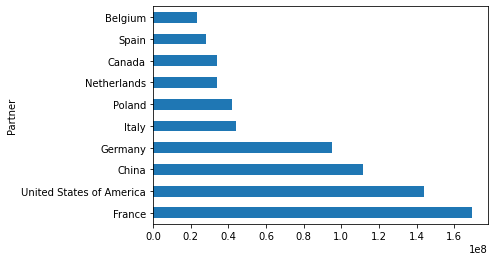

In [8]:
totalImports.head(10).plot(kind='barh')

In [9]:
exports = makeup[makeup[FLOW] == 'Exports']
grouped = exports.groupby([PARTNER])
print('The UK exports to', len(grouped), 'countries.')
print('The 5 biggest importers from the UK are:')
grouped[VALUE].aggregate(sum).sort_values(ascending=False,inplace=False).head()

The UK exports to 153 countries.
The 5 biggest importers from the UK are:


Partner
United States of America    92280412
Belgium                     88584502
Ireland                     87902293
Germany                     71690700
Czech Rep.                  47085644
Name: Trade Value (US$), dtype: int64

# Regular importers

**Which are the regular customers, i.e. which countries buy cosmetics from the UK every month?**

Given that there are three commodities, the third question, 'Which are the regular customers, i.e. which countries buy milk from the UK every month?', is meant in the sense that a regular customer imports both commodities every month. This means that if the exports dataframe is grouped by country, each group has exactly ten rows (three commodities bought each of the five months). To see the countries, only the first month of one commodity has to be listed, as by definition it's the same countries every month and for the other commodity.

In [10]:
def buysEveryMonth(group):
    return len(group) == 15

grouped = exports.groupby([PARTNER])
regular = grouped.filter(buysEveryMonth)
regular[(regular[MONTH] == 202001) & (regular[COMMODITY] == 'Beauty, makeup and skincare preparations')]

,Period,Partner,Trade Flow,Cosmetic and toilet preparations,Trade Value (US$)
59,202001,Malaysia,Exports,"Beauty, makeup and skincare preparations",472152
62,202001,Germany,Exports,"Beauty, makeup and skincare preparations",13854520
68,202001,Bulgaria,Exports,"Beauty, makeup and skincare preparations",917422
69,202001,Estonia,Exports,"Beauty, makeup and skincare preparations",198997
70,202001,Finland,Exports,"Beauty, makeup and skincare preparations",661010
75,202001,United Arab Emirates,Exports,"Beauty, makeup and skincare preparations",3313796
88,202001,Poland,Exports,"Beauty, makeup and skincare preparations",7590029
89,202001,Portugal,Exports,"Beauty, makeup and skincare preparations",635006
90,202001,Qatar,Exports,"Beauty, makeup and skincare preparations",585364
92,202001,Romania,Exports,"Beauty, makeup and skincare preparations",830946


In [11]:
regular[VALUE].sum() / exports[VALUE].sum()

0.8970187116320851

# Bi-directional trade

**Which countries does the UK both import from and export to?**

In [12]:
countries = pivot_table(makeup, index=[PARTNER], columns=[FLOW], 
                        values=VALUE, aggfunc=sum)
countries.head()

Trade Flow,Exports,Imports
Partner,,
Afghanistan,NaN,1884.0
Albania,28439.0,2448.0
Andorra,4723.0,NaN
Angola,3681.0,NaN
Anguilla,4153.0,NaN


In [14]:
countries.dropna()

Trade Flow,Exports,Imports
Partner,,
Albania,28439.0,2448.0
Australia,12713771.0,11754432.0
Austria,2734643.0,681334.0
Bahrain,350176.0,1414.0
Belgium,88584502.0,23585127.0
...,...,...
Ukraine,974448.0,2009162.0
United Arab Emirates,14856359.0,1128029.0
United States of America,92280412.0,143808110.0


# Conclusion

The Beauty industry in trade of the UK from January to May 2020 was analysed in terms of which countries the UK mostly depends on for income (exports) and goods (imports). 

United States of america is the main partner, but it imported from the UK more than it exported to the UK. 

The UK exported to over 153 countries during the period, but only imported from 82 countries, the main ones (top five by trade value) being geographically close.

The UK is heavily dependent on its regular customers, over 40 countries  buy all types of beauty products every month. They contribute to the total export value.

The UK has bi-directional trade (i.e. both exports and imports) with alot of countries, although for some the trade value (in US dollars) is suspiciously low, which raises questions about the data's accuracy.

THANK YOU :)